<a href="https://colab.research.google.com/github/RomaricKanyamibwa/ForestCoverTypePrediction/blob/master/ForestCoverTypePrediction_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
col_names=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
covtype=pd.read_csv(data_url,delimiter=",",header =None,names=col_names)

In [0]:
#Distribution des differents Cover Type
tab=covtype["Cover_Type"].value_counts(ascending=True)
print(tab)

4      2747
5      9493
6     17367
7     20510
3     35754
1    211840
2    283301
Name: Cover_Type, dtype: int64


In [0]:
pd.set_option('display.max_columns', None) # we need to see all the columns
covtype.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

# Construction des données equilibré

In [0]:
import random


covtype_balanced=covtype[covtype['Cover_Type']==4]
#tab=covtype_balanced["Cover_Type"].value_counts(ascending=True)
#print(tab)
frames = [covtype_balanced]

for i in range(1,8):
  if i!=4:
    frames.append(covtype[covtype['Cover_Type']==i].sample(n=int(len(covtype_balanced)*(1+random.uniform(0, 1.2)))))

covtype_balanced=pd.concat(frames)
covtype_balanced=covtype_balanced.sample(frac=1).reset_index(drop=True)#melange des données
tab=covtype_balanced["Cover_Type"].value_counts(ascending=True)
print(tab)
print("Balanced Data Size:",len(covtype_balanced))
#covtype_balanced.head(5)

4    2747
7    3550
5    3551
2    3985
6    4173
3    4510
1    4695
Name: Cover_Type, dtype: int64
Balanced Data Size: 27211


In [0]:
covtype_balanced.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000,27211.000000
mean,2762.922237,157.923560,16.487817,231.565948,50.953181,1747.973944,211.543971,219.135533,136.663592,1543.513542,0.244350,0.033148,0.436294,0.286208,0.023152,0.043071,0.051964,0.058359,0.011319,0.042189,0.000037,0.000073,0.000514,0.146191,0.028187,0.016243,0.032928,0.009481,0.000037,0.006211,0.034398,0.002940,0.003895,0.008673,0.000955,0.025247,0.053324,0.019514,0.000331,0.003124,0.000625,0.000514,0.091691,0.046819,0.022969,0.046048,0.043218,0.001764,0.007129,0.000331,0.001580,0.046121,0.041785,0.027048,3.852339
std,409.731347,111.113527,8.441159,206.103512,60.468654,1348.778710,30.635271,23.021333,45.539734,1123.402489,0.429709,0.179027,0.495934,0.451996,0.150390,0.203020,0.221959,0.234425,0.105789,0.201023,0.006062,0.008573,0.022677,0.353304,0.165510,0.126413,0.178451,0.096912,0.006062,0.078564,0.182252,0.054143,0.062293,0.092726,0.030897,0.156878,0.224683,0.138326,0.018184,0.055804,0.024988,0.022677,0.288594,0.211256,0.149806,0.209592,0.203351,0.041964,0.084136,0.018184,0.039722,0.209751,0.200100,0.162226,2.049594
min,1876.000000,0.000000,0.000000,0.000000,-164.000000,0.000000,54.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2408.000000,64.000000,10.000000,67.000000,6.000000,752.000000,195.000000,207.000000,109.000000,750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2766.000000,128.000000,15.000000,182.000000,33.000000,1342.000000,218.000000,223.000000,140.000000,1282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

# Analyse de données 
verifiecation des proprietes vu dans le dataset globale

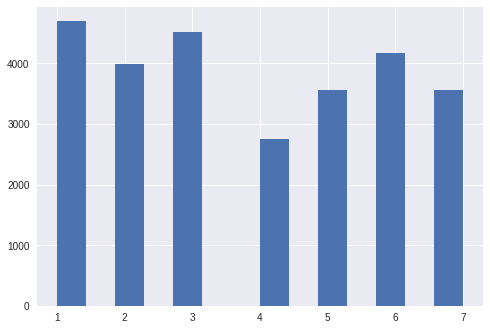

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


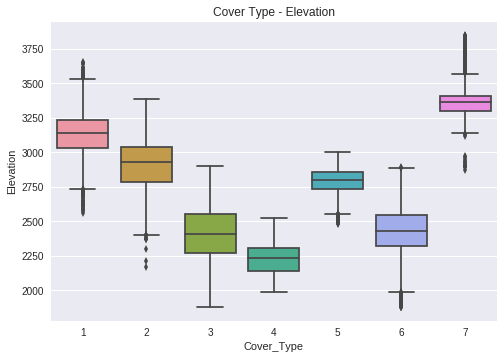

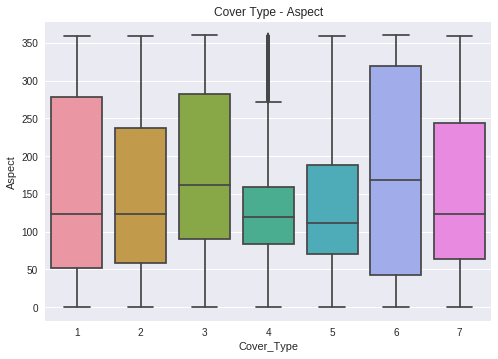

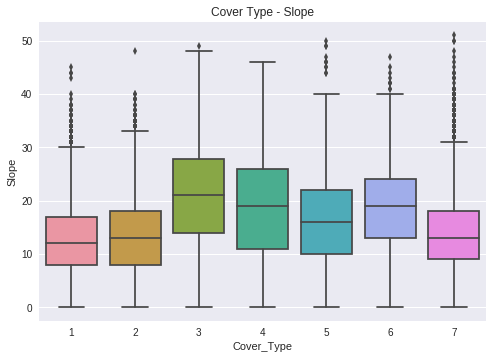

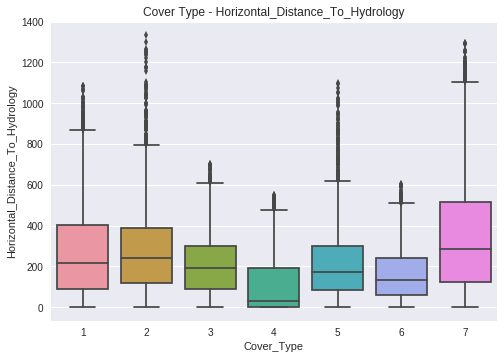

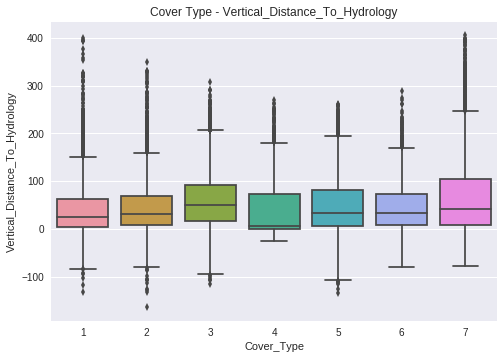

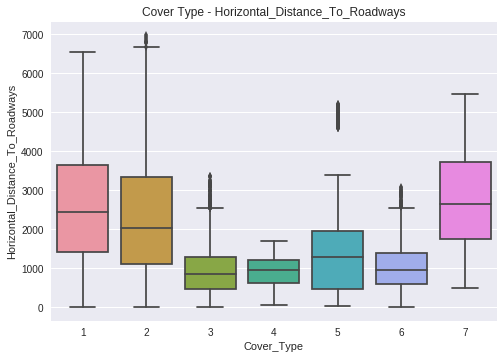

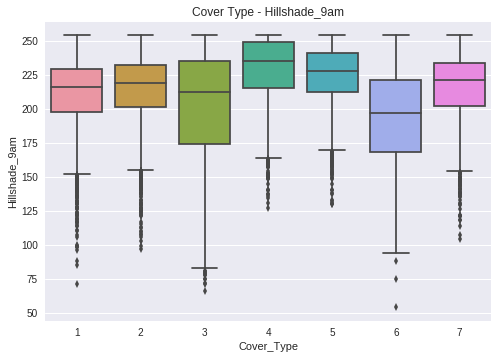

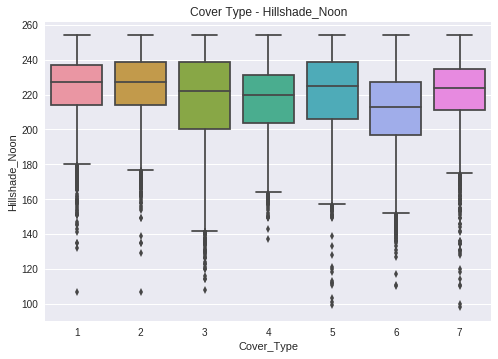

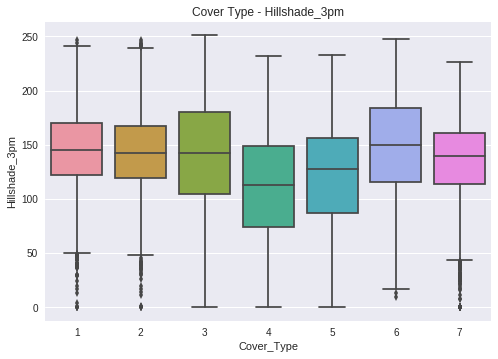

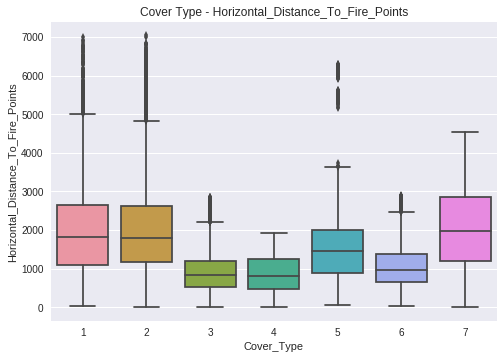

In [0]:
#Histograme 
covtype_balanced['Cover_Type'].hist(bins=2*7);
plt.show()
#sns.boxplot(x="Cover_Type",y="Elevation", data=covtype);
cols = covtype_balanced.columns
size = 10#len(cols) - 1 # on enleve cover_type
# l'axe de x  represente les 7 classes classes
x = cols[-1]
y = cols[0:size]

for i in range(0, size):
    ax=sns.boxplot(data=covtype_balanced, x=x, y=y[i])
    title="Cover Type - "+col_names[i]
    ax.set_title(title)
    #ax = sns.swarmplot(data=covtype, x=x, y=y[i])
    plt.show()

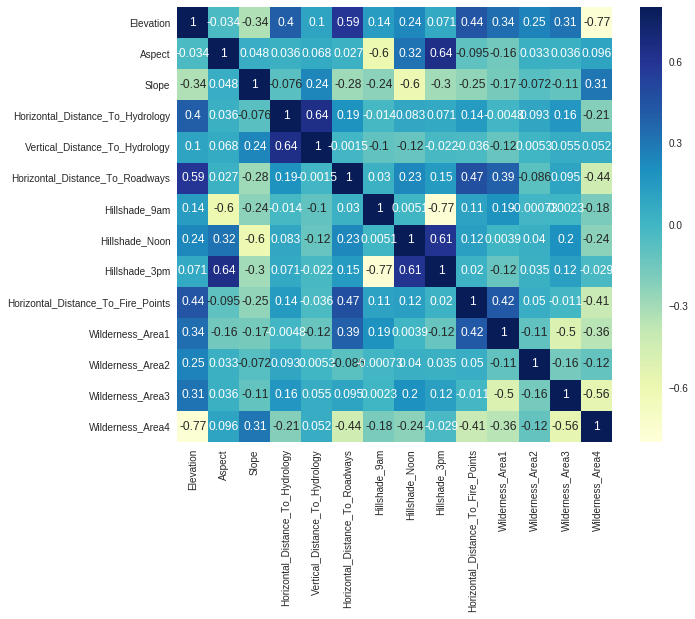

In [0]:
#Matrice de correlation ,on va  étudier l'intensité de la liaison qui peut exister entre les differents variables

size = 14
corrmat = covtype_balanced.iloc[:,:size].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,cmap="YlGnBu");

# **Construction des Modeles Predictives**

In [0]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

In [0]:
#function generique pour un classifieur et sa performance:
def classification_model(model, data, predictors, outcome):
  #entrainement du model:
  tp_d=time()
  model.fit(data[predictors],data[outcome])
  tr_time = time()-tp_d
  
  #predictions sur le training set:
  predictions = model.predict(data[predictors])
  
  #affichage de l'accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits = 10, shuffle = True)#, random_state = 2
  error = []
  for train, test in kf.split(data):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])
  return accuracy,tr_time,"Logit",len(predictors),np.mean(error)

# Logit

In [0]:
outcome_var = 'Cover_Type'
#we increase max_iter to assure convergence
model_LR = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter = 450)
predictor_var = ['Elevation']
scaler = StandardScaler()
end=10 #only categorical variables
#we scale to speed up convergence
scaled_covtype_balanced=covtype_balanced.copy()
scaled_covtype_balanced[col_names[:end]]=scaler.fit_transform(scaled_covtype_balanced[col_names[:end]])
scaled_covtype_balanced.head(5)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1.481676,-1.259308,-0.887077,-0.978002,-0.875729,1.975176,0.047529,0.037551,0.161102,2.357601,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7
1,1.022830,-0.098312,0.297617,-0.832441,-1.289174,0.586487,0.994167,0.689133,-0.497675,1.139850,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7
2,-1.051738,0.603686,-1.597893,0.628017,1.538789,-0.347709,0.112814,0.993204,0.622246,-0.406374,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,-0.373232,-0.737310,-1.242485,-0.148307,0.033850,0.720685,0.537169,0.428500,-0.014572,-0.664523,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0.534696,-0.260311,-0.531669,0.574644,-0.561511,2.941994,0.928882,0.602255,-0.343961,1.968597,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [0]:
TrainingTime=[]
Accuracy=[]
Nb_Features=[]
Classifier=[]
Cross_Validation=[]

for i in range(1,len(col_names)-1,6):
  print("Logit with ",len(col_names[:i])," feature(s)")
  accuracy,tr_time,classifier_type,nb_features,cross_val=classification_model(model_LR, scaled_covtype_balanced,col_names[:i],outcome_var)
  
  TrainingTime.append(tr_time)
  Accuracy.append(accuracy)
  Nb_Features.append(nb_features)
  Classifier.append(classifier_type)
  Cross_Validation.append(cross_val)


Logit with  1  feature(s)
Accuracy : 50.171%
Cross-Validation Score : 50.072%
Logit with  7  feature(s)
Accuracy : 61.361%
Cross-Validation Score : 61.233%
Logit with  13  feature(s)
Accuracy : 66.003%
Cross-Validation Score : 65.859%
Logit with  19  feature(s)
Accuracy : 67.403%
Cross-Validation Score : 67.175%
Logit with  25  feature(s)
Accuracy : 67.601%
Cross-Validation Score : 67.366%
Logit with  31  feature(s)
Accuracy : 68.057%
Cross-Validation Score : 67.884%
Logit with  37  feature(s)
Accuracy : 68.766%
Cross-Validation Score : 68.568%
Logit with  43  feature(s)
Accuracy : 68.656%
Cross-Validation Score : 68.487%
Logit with  49  feature(s)
Accuracy : 69.582%
Cross-Validation Score : 69.395%


In [0]:
d = {'Type of Classifier':Classifier,'Number of Features':Nb_Features,
     'Training Time': TrainingTime, 'Accuracy': Accuracy,'Cross-Validation':Cross_Validation}
df = pd.DataFrame(data=d)
df = df[list(d.keys())]
df.sort_values(by=['Type of Classifier','Accuracy']).head(10)

,Type of Classifier,Number of Features,Training Time,Accuracy,Cross-Validation
0,Logit,1,1.089827,0.501709,0.500716
1,Logit,7,2.229708,0.613612,0.612326
2,Logit,13,8.603360,0.660027,0.658595
3,Logit,19,9.521238,0.674029,0.671750
4,Logit,25,10.432980,0.676013,0.673661
5,Logit,31,11.512022,0.680570,0.678842
7,Logit,43,11.499240,0.686561,0.684871
6,Logit,37,10.653116,0.687663,0.685678
8,Logit,49,11.872795,0.695822,0.693947


# Logit avec selection de features


**Feature Importance**

In [0]:
def best_n_features(data,n=10,n_classes=7):
  X = data.iloc[:,:-1]  #independent columns
  y = data.iloc[:,-1]    #target column i.e price range

  model = ExtraTreesClassifier(n_classes)
  model.fit(X,y)
  #print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
  #plot graph of feature importances for better visualization
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  feat_importances.nlargest(n).plot(kind='barh')
  #print(list(feat_importances.nlargest(n).index))
  plt.show()
  return (feat_importances)

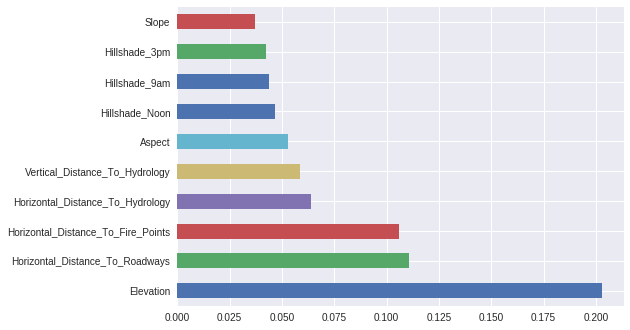

In [0]:
globl_features=best_n_features(covtype,n=10)
#list(globl_features.nlargest(5).index)

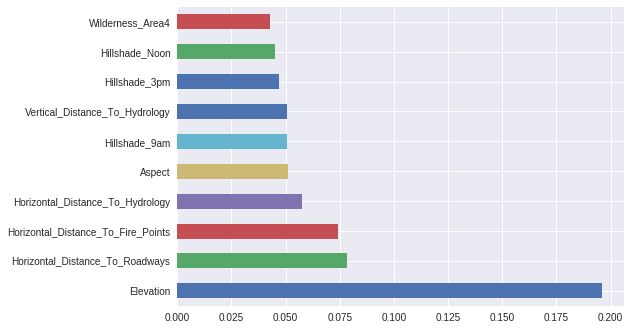

In [0]:
local_features=best_n_features(covtype_balanced,n=10)
#list(globl_features.nlargest(5).index)

In [0]:
for i in [5,10,15,20]:
  print("Logit with ",i," best feature(s)")
  accuracy,tr_time,classifier_type,nb_features,cross_val=classification_model(
      model_LR, scaled_covtype_balanced,
      list(globl_features.nlargest(i).index),outcome_var)
  
  classifier_type=classifier_type+"_glob_feat_selec"
  
  TrainingTime.append(tr_time)
  Accuracy.append(accuracy)
  Nb_Features.append(nb_features)
  Classifier.append(classifier_type)
  Cross_Validation.append(cross_val)
  
  accuracy,tr_time,classifier_type,nb_features,cross_val=classification_model(
      model_LR, scaled_covtype_balanced,
      list(local_features.nlargest(i).index),outcome_var)
  
  classifier_type=classifier_type+"_loc_feat_selec"
  
  TrainingTime.append(tr_time)
  Accuracy.append(accuracy)
  Nb_Features.append(nb_features)
  Classifier.append(classifier_type)
  Cross_Validation.append(cross_val)

Logit with  5  best feature(s)
Accuracy : 56.848%
Cross-Validation Score : 56.771%
Accuracy : 57.355%
Cross-Validation Score : 57.267%
Logit with  10  best feature(s)
Accuracy : 63.478%
Cross-Validation Score : 63.294%
Accuracy : 63.823%
Cross-Validation Score : 63.691%
Logit with  15  best feature(s)
Accuracy : 65.569%
Cross-Validation Score : 65.481%
Accuracy : 66.073%
Cross-Validation Score : 65.926%
Logit with  20  best feature(s)
Accuracy : 67.763%
Cross-Validation Score : 67.557%
Accuracy : 67.517%
Cross-Validation Score : 67.425%


In [0]:
d = {'Type of Classifier':Classifier,'Number of Features':Nb_Features,
     'Training Time': TrainingTime, 'Accuracy': Accuracy,'Cross-Validation':Cross_Validation}
df2 = pd.DataFrame(data=d)
df2 = df2[list(d.keys())]
df2.sort_values(by=['Type of Classifier','Accuracy']).head(30)

,Type of Classifier,Number of Features,Training Time,Accuracy,Cross-Validation
0,Logit,1,1.089827,0.501709,0.500716
1,Logit,7,2.229708,0.613612,0.612326
2,Logit,13,8.603360,0.660027,0.658595
3,Logit,19,9.521238,0.674029,0.671750
4,Logit,25,10.432980,0.676013,0.673661
5,Logit,31,11.512022,0.680570,0.678842
7,Logit,43,11.499240,0.686561,0.684871
6,Logit,37,10.653116,0.687663,0.685678
8,Logit,49,11.872795,0.695822,0.693947
9,Logit_glob_feat_selec,5,2.442315,0.568483,0.567711


# Unvariate feature selection 
with  chi2

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = covtype_balanced.drop(["Cover_Type","Vertical_Distance_To_Hydrology"],axis=1)  #independent columns
y = covtype_balanced.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                 Specs         Score
4      Horizontal_Distance_To_Roadways  9.478483e+06
8   Horizontal_Distance_To_Fire_Points  4.948380e+06
0                            Elevation  1.409511e+06
3     Horizontal_Distance_To_Hydrology  5.945739e+05
1                               Aspect  4.067589e+04
7                        Hillshade_3pm  2.617184e+04
5                        Hillshade_9am  1.513095e+04
2                                Slope  1.344049e+04
12                    Wilderness_Area4  1.183217e+04
22                         Soil_Type10  6.367509e+03


In [0]:
for i in [5,10,15,20]:
  print("Logit with ",i," best feature(s) (Chi2)")
  feat=featureScores.nlargest(i,'Score')
  list_feat=list(feat['Specs'])
  accuracy,tr_time,classifier_type,nb_features,cross_val=classification_model(
      model_LR, scaled_covtype_balanced,
      list_feat,outcome_var)
  
  classifier_type=classifier_type+"_glob_chi2_feat"
  
  TrainingTime.append(tr_time)
  Accuracy.append(accuracy)
  Nb_Features.append(nb_features)
  Classifier.append(classifier_type)
  Cross_Validation.append(cross_val)

Logit with  5  best feature(s) (Chi2)
Accuracy : 57.355%
Cross-Validation Score : 57.227%
Logit with  10  best feature(s) (Chi2)
Accuracy : 63.474%
Cross-Validation Score : 63.386%
Logit with  15  best feature(s) (Chi2)
Accuracy : 66.091%
Cross-Validation Score : 65.881%
Logit with  20  best feature(s) (Chi2)
Accuracy : 67.561%
Cross-Validation Score : 67.370%


In [0]:
d = {'Type of Classifier':Classifier,'Number of Features':Nb_Features,
     'Training Time': TrainingTime, 'Accuracy': Accuracy,'Cross-Validation':Cross_Validation}
df3 = pd.DataFrame(data=d)
df3 = df3[list(d.keys())]
df3.sort_values(by=['Type of Classifier','Accuracy']).head(30)

,Type of Classifier,Number of Features,Training Time,Accuracy,Cross-Validation
0,Logit,1,1.089827,0.501709,0.500716
1,Logit,7,2.229708,0.613612,0.612326
2,Logit,13,8.603360,0.660027,0.658595
3,Logit,19,9.521238,0.674029,0.671750
4,Logit,25,10.432980,0.676013,0.673661
5,Logit,31,11.512022,0.680570,0.678842
7,Logit,43,11.499240,0.686561,0.684871
6,Logit,37,10.653116,0.687663,0.685678
8,Logit,49,11.872795,0.695822,0.693947
17,Logit_glob_chi2_feat,5,2.340373,0.573555,0.572269


# Logit with 10 features
to avoid overfitting with 2 many variables and to have the best generic model possible we use the global model with 10 features (**line 11**)

In [0]:
# Restrict minor warnings
import warnings
warnings.filterwarnings('ignore')
n_feat=10
feat=featureScores.nlargest(n_feat,'Score')
list_feat=list(feat['Specs'])
predictors=list_feat
#predictors=list(globl_features.nlargest(n_feat).index)

In [0]:
def test_model(model,predictors):
  model.fit(scaled_covtype_balanced[predictors],scaled_covtype_balanced["Cover_Type"])

  #predictions sur le training set:
  predictions = model.predict(scaled_covtype_balanced[predictors])

  #affichage de l'accuracy
  accuracy = metrics.accuracy_score(predictions,scaled_covtype_balanced["Cover_Type"])
  print ("Balanced dataset's Accuracy : %s" % "{0:.3%}".format(accuracy))

  end=10 #only categorical variables
  #we scale to speed up convergence
  scaled_covtype=covtype.copy()
  scaled_covtype[col_names[:end]]=scaler.fit_transform(covtype[col_names[:end]])

  #predictions sur le training set:
  predictions = model.predict(scaled_covtype[predictors])

  #affichage de l'accuracy
  accuracy = metrics.accuracy_score(predictions,scaled_covtype["Cover_Type"])
  print ("Global dataset's Accuracy : %s" % "{0:.3%}".format(accuracy))

In [0]:
test_model(model_LR,predictors)

Balanced dataset's Accuracy : 63.474%
Global dataset's Accuracy : 36.806%


Global dataset's Accuracy : 36.806%


# Decision Tree-Random Forest


In [0]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(7),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [0]:
for num_cl,cl in enumerate(classifiers):
  for i in [5,10,15,20]:
    print(names[num_cl]," with ",i," best feature(s)")
    feat=featureScores.nlargest(i,'Score')
    list_feat=list(feat['Specs'])
    predictors=[list_feat,list(globl_features.nlargest(i).index)]
    type_pred=[" FeatSel"," Chi2Sel"]
    
    for k,pred in enumerate(predictors):
      accuracy,tr_time,classifier_type,nb_features,cross_val=classification_model(
          cl, scaled_covtype_balanced,
          pred,outcome_var)
  
      classifier_type=names[num_cl]+type_pred[k]

      TrainingTime.append(tr_time)
      Accuracy.append(accuracy)
      Nb_Features.append(nb_features)
      Classifier.append(classifier_type)
      Cross_Validation.append(cross_val)
  

In [0]:
#TrainingTime=TrainingTime[:21]
#Accuracy=Accuracy[:21]
#Nb_Features=Nb_Features[:21]
#Classifier=Classifier[:21]
#Cross_Validation=Cross_Validation[:21]

In [0]:
d = {'Type of Classifier':Classifier,'Number of Features':Nb_Features,
     'Training Time': TrainingTime, 'Accuracy': Accuracy,'Cross-Validation':Cross_Validation}

df2 = pd.DataFrame(data=d)
df2 = df2[list(d.keys())]
df2[df2["Number of Features"]<=15].sort_values(by=['Accuracy'],ascending=False).head(50)

,Type of Classifier,Number of Features,Training Time,Accuracy,Cross-Validation
19,Logit_glob_chi2_feat,15,6.915877,0.660909,0.658814
14,Logit_loc_feat_selec,15,7.268301,0.660725,0.659256
2,Logit,13,8.603360,0.660027,0.658595
25,Decision Tree FeatSel,15,0.095306,0.655874,0.648708
13,Logit_glob_feat_selec,15,8.072834,0.655691,0.654809
26,Decision Tree Chi2Sel,15,0.112150,0.647091,0.637463
21,Decision Tree FeatSel,5,0.069489,0.646246,0.642534
23,Decision Tree FeatSel,10,0.092823,0.646209,0.639154
24,Decision Tree Chi2Sel,10,0.105564,0.646062,0.636544
12,Logit_loc_feat_selec,10,5.446868,0.638235,0.636912


# Test on Global Data


In [0]:
n_feat=15
for num_cl,cl in enumerate(classifiers):
  print("------",names[num_cl]," with ",n_feat," best feature(s)","------")
  feat=featureScores.nlargest(n_feat,'Score')
  list_feat=list(feat['Specs'])
  predictors=[list_feat,list(globl_features.nlargest(10).index)]
  type_pred=[" FeatSel"," Chi2Sel"]
  for k,pred in enumerate(predictors):
    print("\tPredictorType:",type_pred[k])
    test_model(cl,pred)
  print("\n")